## Proyecto 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Definimos la función de condición inicial
def fun(x):
    return np.sin(np.pi*x)
#Establecemos el Método de Diferencias Finitas Progresivo
def MDFProg(Nt,Nx,lamb,w,pt):
    Temp=np.array([w])#Matriz donde guardaremos las temperaturas a ciertos tiempos
    z=np.zeros(Nx) #Arreglo auxiliar que almacenará las temperaturas
    for j in range(1,Nt+1):
        #Condiciones iniciales
        z[0]=0
        z[-1]=0
        for i in range(1,Nx-1):
            z[i]=(1.0-2.0*lamb)*w[i]+lamb*(w[i-1]+w[i+1])#Solución al tiempo t_j
        w=np.copy(z)
        #Cada cierto tiempo almacenamos la solución
        if j%pt==0:
            Temp=np.append(Temp,np.array([w]),axis=0) 
    return Temp
#Establecemos el Método de Diferencias Finitas Regresivo
def MDFReg(Nt,Nx,lamb,w0,pt):
    w=np.zeros(Nx) #Inicializamos el vector de temperaturas(En el caso del problema
                    #debe tener extremos con temperatura 0)
    it=0 #Inicializamos el contador
    itmax=10000 #Máxima iteración
    epsilon=10**(-8) #Tolerancia
    Temp=np.array([w0]) #Matriz que almacena las temperaturas a ciertos tiempos
    for j in range(1,Nt+1):#Cada vez que se itere j, se tomará la solución anterior como w(j-1)
        #Condición inicial de Gauss-Seidel
        z=np.zeros(Nx)
        #Realizamos el método de Gauss-Seidel
        while it<itmax:
            delta=0.0
            length=0.0
            for i in range(1,Nx-1):
                #Fórmula para el método de Gauss-Seidel (Ecuación 24)
                w[i]=(w0[i]+lamb*(z[i+1]+w[i-1]))/(1.0+2.0*lamb) 
                delta+=(z[i]-w[i])**2
                length+=w[i]**2
            delta=np.sqrt(delta/length)
            if delta<epsilon: #Se verifica la convergencia
                #Establecemos la solución en el tiempo j-1
                w0=np.copy(w)
                #Para ciertos tiempos se guarda la solución
                if j%pt==0:
                    Temp=np.append(Temp,np.array([w]),axis=0) 
                break
            else:
                z=np.copy(w)
            it+=1
    return Temp

Probaremos para  $\alpha=1$, $h_x$=0.1 y $h_t$=0.0005

In [3]:
tmax=0.5 #Tiempo máximo de iteración
ht=0.0005 #Intervalo de tiempo
Nt=int(tmax/ht)
hx=0.1 #Intervalo de posición
xmin=0.0
xmax=1.0
L=xmax-xmin

In [4]:
#Definimos el arreglo de las posiciones
xpos=np.arange(xmin,xmax+hx,hx)
Nx=xpos.size #Tamaño del arreglo de las posiciones
#Definimos la temperatura inicial
w=fun(xpos)
alfa=1
lamb=alfa**2*ht/hx**2
pt=100
lamb

0.04999999999999999

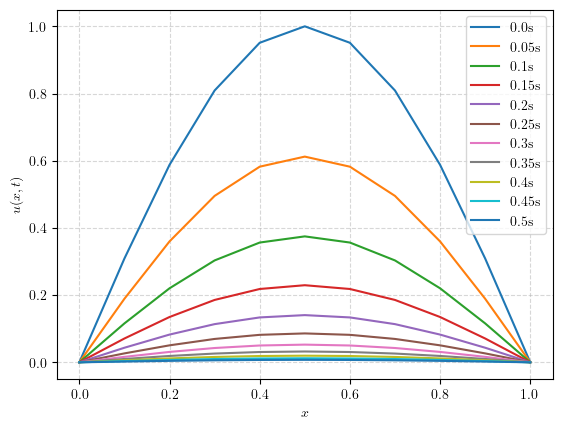

In [5]:
#----------PROGRESIVO-------#
Temppro1=MDFProg(Nt,Nx,lamb,w,pt)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(Temppro1.shape[0]):
    plt.plot(xpos,Temppro1[i], label=str(round(i*pt*ht,2))+"s")
plt.grid(linestyle="--",alpha=0.5)
plt.ylabel(r"$u(x,t)$")
plt.xlabel(r"$x$")
#Muestra la leyenda
plt.legend()
plt.savefig("MDFPro1.pdf")

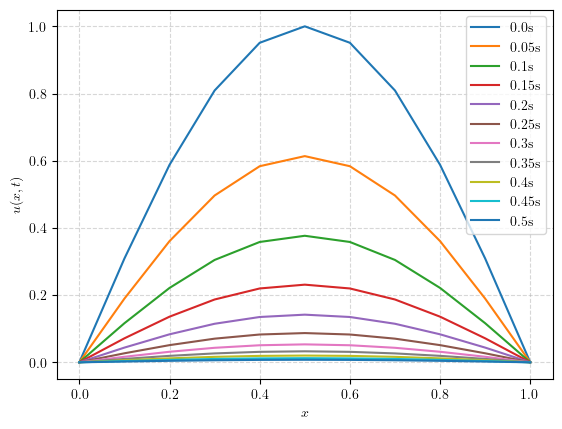

In [6]:
#----------REGRESIVO-----#
w0=fun(xpos)
Tempreg1=MDFReg(Nt,Nx,lamb,w0,pt)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(Tempreg1.shape[0]):
    plt.plot(xpos,Tempreg1[i], label=str(round(i*pt*ht,2))+"s")
plt.grid(linestyle="--",alpha=0.5)
plt.ylabel(r"$u(x,t)$")
plt.xlabel(r"$x$")
#Muestra la leyenda
plt.legend()
plt.savefig("MDFReg1.pdf")

In [7]:
print("Temperaturas por : MDF Progresivo: ", "MDF Regresivo: ","error")
for i in range(Nx):
    a=Temppro1[-1,i]
    b=Tempreg1[-1,i]
    err=abs((a-b)/a)*100
    print("\t",round(a,5),"\t", round(b,5),"\t",round(err,2))

Temperaturas por : MDF Progresivo:  MDF Regresivo:  error
	 0.0 	 0.0 	 nan
	 0.00229 	 0.00234 	 2.42
	 0.00435 	 0.00445 	 2.42
	 0.00599 	 0.00613 	 2.42
	 0.00704 	 0.00721 	 2.42
	 0.0074 	 0.00758 	 2.42
	 0.00704 	 0.00721 	 2.42
	 0.00599 	 0.00613 	 2.42
	 0.00435 	 0.00445 	 2.42
	 0.00229 	 0.00234 	 2.42
	 0.0 	 0.0 	 nan


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14060\1563590635.py:5: RuntimeWarning: invalid value encountered in double_scalars
  err=abs((a-b)/a)*100


Probaremos para L=1 con $h_x$=0.1 y $h_t$=0.01

In [8]:
tmax=0.5 #Tiempo máximo de iteración
ht=0.01 #Intervalo de tiempo
Nt=int(tmax/ht)
hx=0.1 #Intervalo de posición
xmin=0.0
xmax=1.0
L=xmax-xmin

In [9]:
#Definimos el arreglo de las posiciones
xpos=np.arange(xmin,xmax+hx,hx)
Nx=xpos.size #Tamaño del arreglo de las posiciones
#Definimos la temperatura inicial
w=fun(xpos)
alfa=1
lamb=alfa**2*ht/hx**2
pt=10
lamb

0.9999999999999998

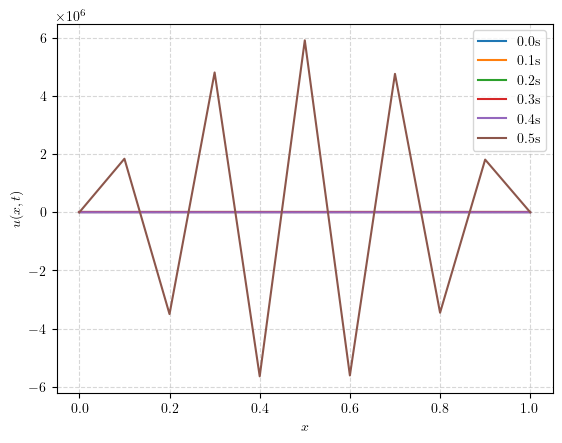

In [10]:
#----------PROGRESIVO-----#
Temppro2=MDFProg(Nt,Nx,lamb,w,pt)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(Temppro2.shape[0]):
    plt.plot(xpos,Temppro2[i], label=str(round(i*pt*ht,2))+"s")
plt.grid(linestyle="--",alpha=0.5)
plt.ylabel(r"$u(x,t)$")
plt.xlabel(r"$x$")
#Muestra la leyenda
plt.legend()
plt.savefig("MDFPro2.pdf")

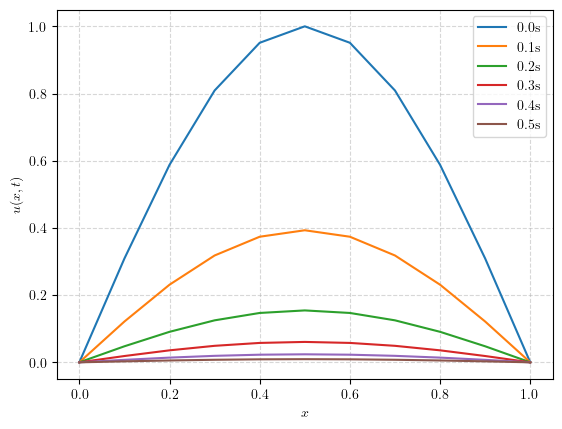

In [11]:
#----------REGRESIVO-----#
w0=fun(xpos)
Tempreg2=MDFReg(Nt,Nx,lamb,w0,pt)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(Tempreg2.shape[0]):
    plt.plot(xpos,Tempreg2[i], label=str(round(i*pt*ht,2))+"s")
plt.grid(linestyle="--",alpha=0.5)
plt.ylabel(r"$u(x,t)$")
plt.xlabel(r"$x$")
#Muestra la leyenda
plt.legend()
plt.savefig("MDFReg2.pdf")

In [12]:
print("Temperaturas por : MDF Progresivo: ", "MDF Regresivo: ")
for i in range(Nx):
    a=Temppro2[-1,i]
    b=Tempreg2[-1,i]
    print("\t",'{:.2e}'.format(a),"\t\t", round(b,5),)

Temperaturas por : MDF Progresivo:  MDF Regresivo: 
	 0.00e+00 		 0.0
	 1.84e+06 		 0.0029
	 -3.50e+06 		 0.00551
	 4.81e+06 		 0.00759
	 -5.64e+06 		 0.00892
	 5.92e+06 		 0.00938
	 -5.62e+06 		 0.00892
	 4.77e+06 		 0.00759
	 -3.46e+06 		 0.00551
	 1.81e+06 		 0.0029
	 0.00e+00 		 0.0
